# Task - Machine Learning

The objective is to predict company's Sector Name from Business Description. 

**Summary**: Naive Bayes gave accuracy of 76% while Logistic Regression gave accuracy of 80%.

## Loading Data

Required modules and libraries are imported below. Data is in an excel file.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_excel('../ML/Data_ML.xlsx')
df.head()

,Identifier,Company Name,Business Description,TRBC Economic Sector Name
0,CMI.N,Cummins Inc,"Cummins Inc. designs, manufactures, distribute...",Consumer Cyclicals
1,RIO.L,Rio Tinto PLC,Rio Tinto plc is a mining and metals company. ...,Basic Materials
2,RIO.AX,Rio Tinto Ltd,Rio Tinto Limited (Rio Tinto) is a mining comp...,Basic Materials
3,RDSa.AS,Royal Dutch Shell PLC,The Royal Dutch Shell plc explores for crude o...,Energy
4,BLT.L,BHP Billiton PLC,BHP Billiton Plc is a global resources company...,Basic Materials


In [3]:
df.tail()

,Identifier,Company Name,Business Description,TRBC Economic Sector Name
23031,MUTG.F,Mineralbrunnen Ueberkingen-Teinach GmbH & Co KGaA,Mineralbrunnen Ueberkingen-Teinach GmbH & Co K...,Consumer Non-Cyclicals
23032,M0Y.DE,Mynaric AG,Mynaric AG is a Germany-based holding company ...,Technology
23033,CGDM.PA,Cegedim SA,Cegedim SA is a France-based company that prod...,Technology
23034,HEIO.AS,Heineken Holding NV,Heineken Holding NV is the Netherlands-based h...,Consumer Non-Cyclicals
23035,ECXn.DE,Epigenomics AG,Epigenomics AG is a Germany-based molecular di...,Healthcare


Data has been loaded successfully. There are 4 columns and around 23000 rows.

## Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23036 entries, 0 to 23035
Data columns (total 4 columns):
Identifier                   23036 non-null object
Company Name                 23036 non-null object
Business Description         23022 non-null object
TRBC Economic Sector Name    23036 non-null object
dtypes: object(4)
memory usage: 720.0+ KB


We notice that there are some null values for Business Description.

In [5]:
df.describe()

,Identifier,Company Name,Business Description,TRBC Economic Sector Name
count,23036,23036,23022,23036
unique,23036,23029,23022,10
top,LOLF.CM,First Bancorp,"SHANXI XINGHUACUN FEN WINE FACTORY CO., LTD is...",Financials
freq,1,2,1,4747


We notice that:

- There are 10 Sectors, Financial Sector being the most frequently occuring.
- Some Company Names are duplicated
- Identifiers are all unique so even if a company name is duplicated they will have unique Identifier.

**Sector Names.**

Below, we get the list of 10 Sector Names.

In [6]:
sectors = df['TRBC Economic Sector Name'].unique()
sectors = sorted(list(sectors))
sectors

['Basic Materials',
 'Consumer Cyclicals',
 'Consumer Non-Cyclicals',
 'Energy',
 'Financials',
 'Healthcare',
 'Industrials',
 'Technology',
 'Telecommunications Services',
 'Utilities']

We had noticed that some company names were duplicated. Below is a list of them. 7 names were duplicated so there are 14 rows.

In [7]:
duplicates = df[df['Company Name'].duplicated(keep=False)]
duplicates.sort_values('Company Name')

,Identifier,Company Name,Business Description,TRBC Economic Sector Name
2968,601628.SS,China Life Insurance Co Ltd,China Life Insurance Company Limited is a life...,Financials
6623,2823.TW,China Life Insurance Co Ltd,"China Life Insurance Co., Ltd. is a Taiwan-bas...",Financials
1526,DLTA.ZI,Delta Corp Ltd,Delta Corporation Limited is a holding company...,Consumer Non-Cyclicals
17011,DELT.NS,Delta Corp Ltd,Delta Corp Limited is a holding company engage...,Consumer Cyclicals
18845,FBP.N,First Bancorp,First BanCorp. is a financial holding company....,Financials
19317,FBNC.OQ,First Bancorp,First Bancorp is the bank holding company for ...,Financials
18892,INDB.OQ,Independent Bank Corp,Independent Bank Corp. is a bank holding compa...,Financials
20369,IBCP.OQ,Independent Bank Corp,Independent Bank Corporation is a bank holding...,Financials
1104,SEED.ZI,Seed Co Ltd,Seed Co Limited is a holding company and is en...,Consumer Non-Cyclicals
10629,7743.T,Seed Co Ltd,"SEED CO.,LTD. is mainly engaged in the researc...",Healthcare


**Taking care of Null values.**

Below we notice that it's only Business Description column that nas null values - 14 of them.

In [8]:
df.isnull().sum()

Identifier                    0
Company Name                  0
Business Description         14
TRBC Economic Sector Name     0
dtype: int64

Let's check the shape before we remove null rows.

In [9]:
df.shape

(23036, 4)

Removing null rows, and verifying by checking the shape.

In [10]:
df = df[pd.notnull(df['Business Description'])]
df.shape

(23022, 4)

**Sector Counts.**

Below is the counts of number of Companies in each Sector.

In [11]:
sector_counts = df['TRBC Economic Sector Name'].value_counts()
sector_counts

Financials                     4743
Industrials                    4049
Consumer Cyclicals             3617
Technology                     2592
Basic Materials                2483
Healthcare                     1770
Consumer Non-Cyclicals         1735
Energy                         1062
Utilities                       664
Telecommunications Services     307
Name: TRBC Economic Sector Name, dtype: int64

Let's plot it.

Text(0.5,1,'Sector Counts')

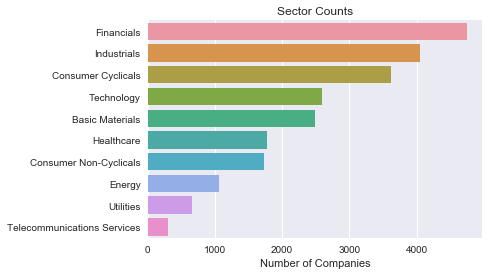

In [12]:
plt.figure(figsize=(6, 4))
sns.barplot(sector_counts.values, sector_counts.index, orient='h')
plt.xlabel('Number of Companies')
plt.title('Sector Counts')

## Data Modelling

We need to convert the Sector Names into Categories. Below takes care of that.

In [13]:
df['Sector ID'] = df['TRBC Economic Sector Name'].factorize(sort=True)[0]
df.head()

,Identifier,Company Name,Business Description,TRBC Economic Sector Name,Sector ID
0,CMI.N,Cummins Inc,"Cummins Inc. designs, manufactures, distribute...",Consumer Cyclicals,1
1,RIO.L,Rio Tinto PLC,Rio Tinto plc is a mining and metals company. ...,Basic Materials,0
2,RIO.AX,Rio Tinto Ltd,Rio Tinto Limited (Rio Tinto) is a mining comp...,Basic Materials,0
3,RDSa.AS,Royal Dutch Shell PLC,The Royal Dutch Shell plc explores for crude o...,Energy,3
4,BLT.L,BHP Billiton PLC,BHP Billiton Plc is a global resources company...,Basic Materials,0


Building dictionaries of sectors to ids and vice versa for future use. This would come in handy when we have got predictions.

In [14]:
sector_to_id = dict(df[['TRBC Economic Sector Name','Sector ID']].values)
sector_to_id

{'Basic Materials': 0,
 'Consumer Cyclicals': 1,
 'Consumer Non-Cyclicals': 2,
 'Energy': 3,
 'Financials': 4,
 'Healthcare': 5,
 'Industrials': 6,
 'Technology': 7,
 'Telecommunications Services': 8,
 'Utilities': 9}

In [15]:
id_to_sector = dict(df[['Sector ID','TRBC Economic Sector Name']].values)
id_to_sector

{0: 'Basic Materials',
 1: 'Consumer Cyclicals',
 2: 'Consumer Non-Cyclicals',
 3: 'Energy',
 4: 'Financials',
 5: 'Healthcare',
 6: 'Industrials',
 7: 'Technology',
 8: 'Telecommunications Services',
 9: 'Utilities'}

**Features and Targets.**

X is feature inputs and y is target outputs.

In [16]:
X = df['Business Description']
y = df['Sector ID']

X.shape, y.shape

((23022,), (23022,))

Taking a look at first few inputs.

In [17]:
X.head()

0    Cummins Inc. designs, manufactures, distribute...
1    Rio Tinto plc is a mining and metals company. ...
2    Rio Tinto Limited (Rio Tinto) is a mining comp...
3    The Royal Dutch Shell plc explores for crude o...
4    BHP Billiton Plc is a global resources company...
Name: Business Description, dtype: object

Same thing with the outputs.

In [18]:
y.head()

0    1
1    0
2    0
3    3
4    0
Name: Sector ID, dtype: int64

Splitting into training and test sets.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Checking the shapes of training and test sets. We notice that they have been split 75:25 ratio.

In [20]:
splits = [X_train, X_test, y_train, y_test]
for _ in splits:
    print(_.shape)

(17266,)
(5756,)
(17266,)
(5756,)


## Vectorising Texts

We would need to convert the sequence of words into sequence of numbers and vectorise them. Below takes cares of that.

In [21]:
vect = CountVectorizer()

Below gets all the unique words from the training set and builds a vocabulary.

In [22]:
%time vect.fit(X_train)

Wall time: 2.62 s


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Notice the column dimension - 66679: this is the number of unique words from the training data. 

17266 is the number of training samples. 

dtm stands for document term matrix.

In [23]:
X_train_dtm = vect.transform(X_train)
X_train_dtm

<17266x66679 sparse matrix of type '<class 'numpy.int64'>'
	with 1138763 stored elements in Compressed Sparse Row format>

We convert the test inputs (raw text) into matrices (numbers) as well.

Notice the same number of column dimension - 66679.

5756 is the number of test samples.

In [24]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<5756x66679 sparse matrix of type '<class 'numpy.int64'>'
	with 366707 stored elements in Compressed Sparse Row format>

## Naive Bayes

Initialising Naive Bayes classifier.

In [25]:
nb = MultinomialNB()

Notice we are passing in X_train_dtm, and not X_train.

In [26]:
%time nb.fit(X_train_dtm, y_train)

Wall time: 74 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Getting predictions.

In [27]:
y_pred_nb = nb.predict(X_test_dtm)

We get 77% accuracy with Naive Bayes.

In [28]:
metrics.accuracy_score(y_test, y_pred_nb)

0.7720639332870048

Below we take a look at the results from the first 10 samples from the test set.

In [29]:
trueSectorNames_10 = [id_to_sector[true_sector_id] for true_sector_id in y_test[:10]] 
predSectorNames_10_nb = [id_to_sector[pred_sector_id] for pred_sector_id in y_pred_nb[:10]] 


pd.DataFrame({'Business Description':X_test[:10],
             'True Sector Name':trueSectorNames_10,
             'Predicted Sector Names':predSectorNames_10_nb})

,Business Description,True Sector Name,Predicted Sector Names
2479,"Anhui Deli Housedhold Glass Co.,Ltd is a China...",Consumer Cyclicals,Consumer Cyclicals
16617,Tokyo Cement Company (Lanka) PLC is a holding ...,Basic Materials,Basic Materials
1515,Transcorp Hotels Plc is engaged in the renderi...,Consumer Cyclicals,Consumer Cyclicals
10506,"HONEYS HOLDINGS CO., LTD., formerly HONEYS. CO...",Consumer Cyclicals,Consumer Cyclicals
22838,EnviTec Biogas AG is a Germany-based biogas pl...,Utilities,Industrials
11277,Inversiones Nacionales de Turismo SA (INTURSA)...,Consumer Cyclicals,Consumer Cyclicals
2335,"YUEYANG XINGCHANG PETRO-CHEMICAL CO., LTD. is ...",Basic Materials,Basic Materials
16619,Solar Industries India Limited is an explosive...,Basic Materials,Basic Materials
5217,"Shanghai Weihong Electronic Technology Co., Lt...",Industrials,Industrials
20221,Rosetta Stone Inc. (Rosetta Stone) offers pers...,Technology,Technology


One of them was wrongly predicted - ID 22838. True value is Utilities but it was predicted as Industrials.

In [30]:
X_test[22838]

"EnviTec Biogas AG is a Germany-based biogas plant construction company. It provides planning, construction, installation, and repair and maintenance services for biogas plants. The Company operates through four segments: Own Plant Operation, Plant Construction, Energy and Service. The Own Plant Operation segment comprises activities related to the generation of electricity from biogas plants owned by the Company. The Plant Construction segment includes biogas plant planning and construction services to third parties. The Energy segment offers direct feeding of upgraded biomethane produced in the Company's plants, as well as services related to the direct marketing of electricity produced in biogas plants. The Service segment provides services related to the operation of biogas plants, such as installation, controls and repair and maintenance."

Below we get the confusion matrix.

In [31]:
metrics.confusion_matrix(y_test, y_pred_nb)

array([[ 500,   17,    6,    3,   10,    3,   80,    6,    0,    0],
       [  41,  627,   14,    0,   42,    2,  125,   63,    0,    0],
       [  10,   50,  333,    0,    7,   15,   26,    3,    0,    0],
       [  18,    4,    1,  152,    1,    1,   52,    2,    0,    1],
       [   6,   20,    1,    1, 1084,    0,   48,    9,    0,    0],
       [  10,    4,   15,    0,   13,  402,   24,    6,    0,    0],
       [  29,   41,    6,    8,   58,    3,  773,  103,    0,    0],
       [   5,   37,    1,    0,   11,    2,   83,  499,    0,    0],
       [   0,    4,    0,    0,    5,    0,    6,   55,    6,    0],
       [   1,    2,    0,   13,    3,    0,   75,    1,    0,   68]],
      dtype=int64)

And below is classification report with f1 score.

In [32]:
print(metrics.classification_report(y_test, y_pred_nb, target_names=sectors))

                             precision    recall  f1-score   support

            Basic Materials       0.81      0.80      0.80       625
         Consumer Cyclicals       0.78      0.69      0.73       914
     Consumer Non-Cyclicals       0.88      0.75      0.81       444
                     Energy       0.86      0.66      0.74       232
                 Financials       0.88      0.93      0.90      1169
                 Healthcare       0.94      0.85      0.89       474
                Industrials       0.60      0.76      0.67      1021
                 Technology       0.67      0.78      0.72       638
Telecommunications Services       1.00      0.08      0.15        76
                  Utilities       0.99      0.42      0.59       163

                avg / total       0.79      0.77      0.77      5756



## Logistic Regression

Initialising Logistic Regression classifier.

In [33]:
lr = LogisticRegression()

Training. Notice that Logistic Regression takes longer time (31.2 s) than Naive Bayes (97 ms).

In [34]:
%time lr.fit(X_train_dtm, y_train)

Wall time: 34.5 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Getting predictions.

In [35]:
y_pred_lr = lr.predict(X_test_dtm)

We get 80% accuracy with Logistic Regression.

In [36]:
metrics.accuracy_score(y_test, y_pred_lr)

0.8080264072272412

Below we take a look at the results from the first 10 samples from the test set.

In [37]:
predSectorNames_10_lr = [id_to_sector[pred_sector_id] for pred_sector_id in y_pred_lr[:10]] 

pd.DataFrame({'Business Description':X_test[:10],
             'True Sector Name':trueSectorNames_10,
             'Predicted Sector Names':predSectorNames_10_lr})

,Business Description,True Sector Name,Predicted Sector Names
2479,"Anhui Deli Housedhold Glass Co.,Ltd is a China...",Consumer Cyclicals,Consumer Cyclicals
16617,Tokyo Cement Company (Lanka) PLC is a holding ...,Basic Materials,Basic Materials
1515,Transcorp Hotels Plc is engaged in the renderi...,Consumer Cyclicals,Financials
10506,"HONEYS HOLDINGS CO., LTD., formerly HONEYS. CO...",Consumer Cyclicals,Consumer Cyclicals
22838,EnviTec Biogas AG is a Germany-based biogas pl...,Utilities,Utilities
11277,Inversiones Nacionales de Turismo SA (INTURSA)...,Consumer Cyclicals,Consumer Cyclicals
2335,"YUEYANG XINGCHANG PETRO-CHEMICAL CO., LTD. is ...",Basic Materials,Basic Materials
16619,Solar Industries India Limited is an explosive...,Basic Materials,Basic Materials
5217,"Shanghai Weihong Electronic Technology Co., Lt...",Industrials,Industrials
20221,Rosetta Stone Inc. (Rosetta Stone) offers pers...,Technology,Technology


One of them was wrongly predicted - ID 1515. True value is Consumer Cyclicals but it was predicted as Financials.

In [38]:
X_test[1515]

"Transcorp Hotels Plc is engaged in the rendering of hotel services. The Company is engaged in developing hospitality assets in Nigeria and West Africa regions. The Company's hotels include Transcorp Hilton Abuja and Transcorp Hotels Calabar. The Company's Transcorp Hilton Abuja hotel has approximately 670 rooms, and it provides cuisine and meeting rooms to business travelers and tourists. The Transcorp Hilton Abuja hotel offers a guest reward program, Hilton Honors, which awards points and miles to members staying at any of the Hilton Group's 3,700 hotels around the world, and airline miles in partnership with over 50 airlines. The 146-room Transcorp Hotels Calabar provides conferencing facilities, dining, round the clock room service, a fitness center, airport pick up and wireless fidelity (wi-fi) in all guest rooms. The Company is a subsidiary of Transnational Corporation of Nigeria Plc (Transcorp)."

Confusion Matrix for Logistic Regression.

In [39]:
metrics.confusion_matrix(y_test, y_pred_lr)

array([[ 510,   15,    9,   12,   12,    3,   47,   15,    0,    2],
       [  29,  700,   21,    2,   33,    3,   71,   51,    3,    1],
       [  10,   31,  358,    1,    9,   16,   11,    6,    1,    1],
       [  10,    2,    2,  186,    4,    1,   11,    5,    0,   11],
       [   7,   29,    1,    4, 1073,    4,   36,   13,    0,    2],
       [   4,    2,   13,    0,    5,  435,    5,   10,    0,    0],
       [  35,   78,    9,   19,   47,    6,  711,  108,    0,    8],
       [   7,   46,    1,    1,   10,    8,   85,  474,    6,    0],
       [   0,    2,    0,    0,    1,    0,    6,    7,   60,    0],
       [   2,    1,    0,    6,    1,    0,    9,    0,    0,  144]],
      dtype=int64)

Classification report with f1 score for Logistic Regression.

In [40]:
print(metrics.classification_report(y_test, y_pred_lr, target_names=sectors))

                             precision    recall  f1-score   support

            Basic Materials       0.83      0.82      0.82       625
         Consumer Cyclicals       0.77      0.77      0.77       914
     Consumer Non-Cyclicals       0.86      0.81      0.83       444
                     Energy       0.81      0.80      0.80       232
                 Financials       0.90      0.92      0.91      1169
                 Healthcare       0.91      0.92      0.92       474
                Industrials       0.72      0.70      0.71      1021
                 Technology       0.69      0.74      0.71       638
Telecommunications Services       0.86      0.79      0.82        76
                  Utilities       0.85      0.88      0.87       163

                avg / total       0.81      0.81      0.81      5756



## Average Result

We have got results from one run. Let's run the above classifiers with 3 iterations (training and test sets will be sampled differently). And we will report the average result.

Below function will take care of that -  it will return accuray and f1 scores.

In [41]:
def mean_clf(X, y, clf):
    
    accuracyScores = []
    f1Scores = []
    
    for iter in range(3):    
        
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        
        vect = CountVectorizer()
        vect.fit(X_train)
        X_train_dtm = vect.transform(X_train)
        X_test_dtm = vect.transform(X_test)

        clf.fit(X_train_dtm, y_train)
        y_pred = clf.predict(X_test_dtm)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        f1 = metrics.f1_score(y_test, y_pred, average='weighted')
        accuracyScores.append(accuracy)
        f1Scores.append(f1)
    
    return accuracyScores, f1Scores

Running 3 iterations for Naive Bayes.

In [42]:
%%time
nb = MultinomialNB()
accuracy_nb, f1_nb = mean_clf(X, y, nb)
print(accuracy_nb)
print(f1_nb)

[0.7708478109798471, 0.7626824183460736, 0.764593467685893]
[0.765255334952377, 0.7581986544142778, 0.7615409447044693]
Wall time: 18.7 s


Running 3 iterations for Logistic Regression.

In [43]:
%%time
lr = LogisticRegression()
accuracy_lr, f1_lr = mean_clf(X, y, lr)
print(accuracy_lr)
print(f1_lr)

[0.8083738707435719, 0.8125434329395413, 0.8019457956914524]
[0.8085858210955582, 0.8125738078717776, 0.8022087344588543]
Wall time: 1min 52s


Reporting the average result. Naive Bayes gave accuracy score of 76% while Logistic Regression gave 80% accuracy score.

In [44]:
pd.DataFrame({'Accuracy Score':[np.array(accuracy_nb).mean(), np.array(accuracy_lr).mean()],
             'F1 Score': [np.array(f1_nb).mean(), np.array(f1_lr).mean()]},
             index=['Naive Bayes','Logistic Regression'])

,Accuracy Score,F1 Score
Naive Bayes,0.766041,0.761665
Logistic Regression,0.807621,0.807789
